In [41]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [42]:
rdir = '/gpfs/data/greenocean/software/resources/MetProcessed/MET_forcing/'

def make_yearlist_met(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []; xlist = []
    for i in range(0,len(yrs)):
        ty = f'{rdir}/scen_1A/MetOffice_tauy_y{yrs[i]}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
        
        tx = f'{rdir}/scen_1A/MetOffice_taux_y{yrs[i]}.nc'
        t2 = glob.glob(tx)
        xlist.append(t2[0])
        
    return ylist, xlist

yl_met, xl_met = make_yearlist_met(1950,1959)

In [64]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

so_csize = (tmesh['csize'][0:37,:].values)
so_csize_broad = np.zeros([365*10, 37, 182])

for i in range(0,365*10):
    so_csize_broad[i,:,:] = so_csize

## histogram example:

https://github.com/SalishSeaCast/analysis_tereza/blob/master/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_REBOOT/MF04_aragonite_saturation_PI6.ipynb

In [71]:
np.shape(bb)

print(bb[0,:,90])
print(bb[2000,:,90])

[0.01547538 0.52090716 0.89732122 1.10003161 1.20660377 1.45212662
 2.02627587 2.87888932 3.69129443 4.14423561 4.29967403 4.21042156
 4.30464268 4.60973358 5.27933979 5.93420362 6.40886068 6.60711098
 6.46829653 6.38896847 6.81638908 7.89660501 9.1692934  9.61218643
 9.45909214 9.20177078 8.87643242 8.6244688  8.39449692 8.27186584
 8.35209465 8.6308794  8.94054604 9.54969311 6.25142002 2.25845385
 0.06525362]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [115]:
def get_histo_met(start, end, typ = 'tauy', var = 'vflx'):
    
    yrs = np.arange(start,end+1,1)
    big_broad = np.zeros([365*10, 37, 182])
    ind = 0
    for i in range(0,len(yrs)):
        
        ty = f'{rdir}/scen_1A/MetOffice_{typ}_y{yrs[i]}.nc'
        t2 = glob.glob(ty)
        met_y = nc.Dataset(t2[0])
        met_vflx = met_y[var][:,0:37,:]
        # print(np.shape(met_vflx))
        # print(np.shape(big_broad))
        big_broad[ind:ind+365,:,:] = met_vflx
        ind = ind+365
    
    nbins = 25
    hist_met_vflx, bins = np.histogram(np.ravel(big_broad), bins=nbins,\
                                 range = [-25, 25], weights=np.ravel(so_csize_broad))

    bin_cent = bins + (bins[1]-bins[0])/2
    tot_count = np.sum(hist_met_vflx)

    
    binsback = bins[0:nbins]
    histback = hist_met_vflx/tot_count
    
    return binsback, histback
    


def get_histo_era(start, end, typ = 'tauy', var = 'vflx'):
    
    yrs = np.arange(start,end+1,1)
    big_broad = np.zeros([365*10, 37, 182])
    ind = 0
    for i in range(0,len(yrs)):
        
        ty = f'/gpfs/data/greenocean/software/products/ERA5Forcing/daily/{typ}_1d_{yrs[i]}_daily.nc'
        #print(ty)
        t2 = glob.glob(ty)
        met_y = nc.Dataset(t2[0])
        met_vflx = met_y[var][0:365,0:37,:]
        # print(np.shape(met_vflx))
        # print(np.shape(big_broad))
        big_broad[ind:ind+365,:,:] = met_vflx
        ind = ind+365
    
    nbins = 25
    hist_met_vflx, bins = np.histogram(np.ravel(big_broad), bins=nbins,\
                                 range = [-25, 25], weights=np.ravel(so_csize_broad))

    bin_cent = bins + (bins[1]-bins[0])/2
    tot_count = np.sum(hist_met_vflx)

    
    binsback = bins[0:nbins]
    histback = hist_met_vflx/tot_count
    
    return binsback, histback
    


        

In [103]:
met_hists_tauy_ar = []
met_bins_tauy_ar = []

start = 1950
for d in range(0,7):
    print(start)
    end = start+9
    binsback, histback = get_histo_met(start, end, typ = 'tauy', var = 'vflx')
    met_hists_tauy_ar.append(histback)
    met_bins_tauy_ar.append(binsback)
    start = start+10

   ####### 
met_hists_taux_ar = []
met_bins_taux_ar = []

start = 1950
for d in range(0,7):
    print(start)
    end = start+9
    binsback, histback = get_histo_met(start, end, typ = 'taux', var = 'uflx')
    met_hists_taux_ar.append(histback)
    met_bins_taux_ar.append(binsback)
    start = start+10

1950
1960
1970
1980
1990
2000
2010
1950
1960
1970
1980
1990
2000
2010


In [116]:
era_hists_tauy_ar = []
era_bins_tauy_ar = []

start = 1950
for d in range(0,7):
    print(start)
    end = start+9
    binsback, histback = get_histo_era(start, end, typ = 'tauy', var = 'vflx')
    era_hists_tauy_ar.append(histback)
    era_bins_tauy_ar.append(binsback)
    start = start+10

   ####### 
era_hists_taux_ar = []
era_bins_taux_ar = []

start = 1950
for d in range(0,7):
    print(start)
    end = start+9
    binsback, histback = get_histo_era(start, end, typ = 'taux', var = 'uflx')
    era_hists_taux_ar.append(histback)
    era_bins_taux_ar.append(binsback)
    start = start+10

1950
1960
1970
1980
1990
2000
2010
1950
1960
1970
1980
1990
2000
2010


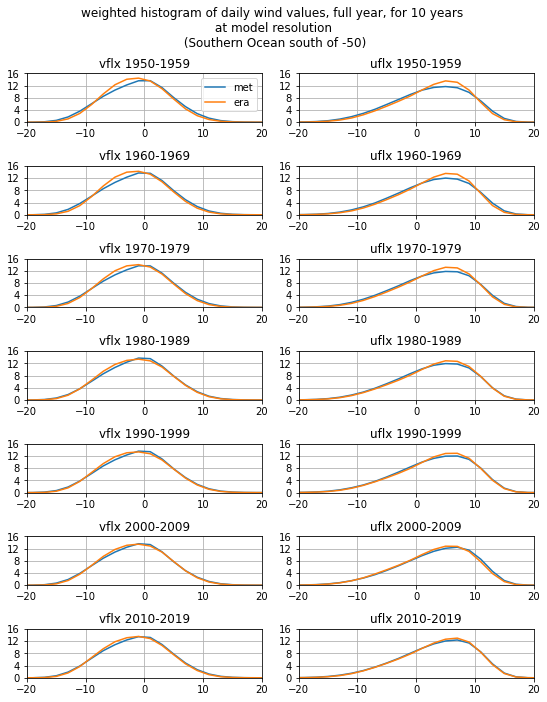

In [133]:
fact = 0.55

fig, axs = plt.subplots(7,2, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,7):
    axs[0+2*i].plot(met_bins_tauy_ar[i],met_hists_tauy_ar[i]*100, label = 'met')
    axs[1+2*i].plot(met_bins_taux_ar[i],met_hists_taux_ar[i]*100, label = 'met')
    axs[0+2*i].plot(era_bins_tauy_ar[i],era_hists_tauy_ar[i]*100, label = 'era')
    axs[1+2*i].plot(era_bins_taux_ar[i],era_hists_taux_ar[i]*100, label = 'era')
    axs[0+2*i].set_title(f'vflx {1950+i*10}-{1950+i*10+9}')
    axs[1+2*i].set_title(f'uflx {1950+i*10}-{1950+i*10+9}')
    axs[0].legend()

for i in range(0,14):
    axs[i].grid()
    axs[i].set_xlim([-20,20])
    axs[i].set_ylim([0,16])
    axs[i].set_yticks(np.arange(0,20,4))

plt.suptitle('weighted histogram of daily wind values, full year, for 10 years \n at model resolution \n (Southern Ocean south of -50)')
fig.tight_layout()

In [134]:
print('compute complete')

compute complete
